<a href="https://colab.research.google.com/github/anikashaji/CODSOFT/blob/main/Titanic_Dataset_Data_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING THE DATA**

In [ ]:
 import pandas as pd
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
# Display the first few rows
df.head(20)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **DATA CLEANING - PREPROCESSING**

**CHECKING FOR NULLS**

In [ ]:
df.isnull().sum()

**DROPPING UNNECESSARY COLUMNS**

In [ ]:
df = df.drop(columns=['Cabin'])

In [ ]:
df = df.drop(columns=['PassengerId','Name'])

In [ ]:
df = df.drop(columns=['Ticket'])

In [ ]:
df.isnull().sum()

**REMOVING NULLS USING KNN IMPUTER**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
knn_df = df[features]
knn_df_imputed = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)
df['Age'] = knn_df_imputed['Age']

**FILLING NULLS WITH MOST FREQUENT VALUES**

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


**CHECKING DATATYPES**

In [ ]:
df.dtypes

**CONVERSION TO APPROPRIATE DATATYPE**

In [ ]:
df['Age'] = df['Age'].astype(int)

**CONVERSION OF COLUMN TYPE USING ONE HOT ENCODER**

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.head())

# **`EXPLORATORY DATA ANALYSIS`**

**UNIVARIATE ANALYSIS**

**Distribution of the Target Variable (Survived)**

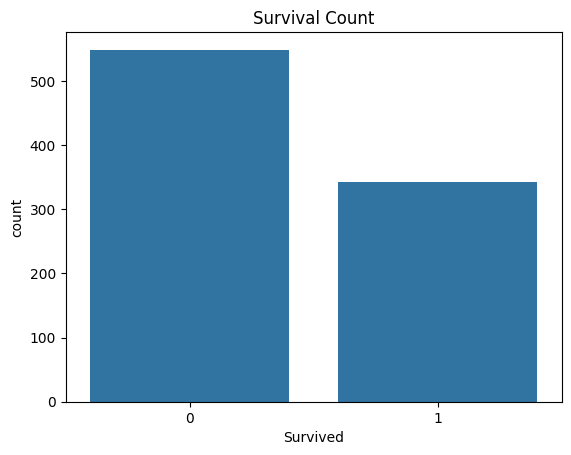

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Percentage of survival
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

**Distribution of Age**

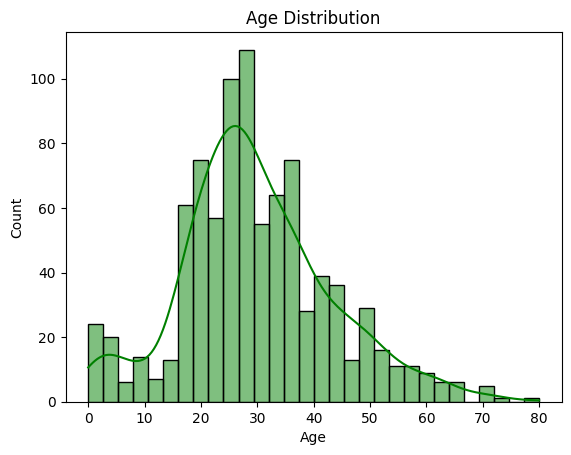

In [ ]:
sns.histplot(df['Age'], kde=True, bins=30, color="green")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

**Distribution of Fare**

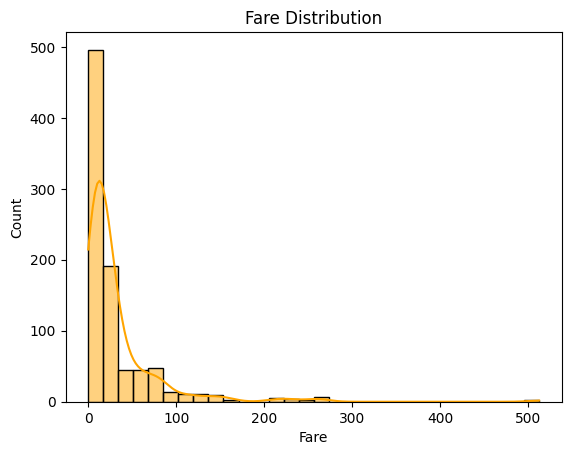

In [ ]:
sns.histplot(df['Fare'], kde=True, bins=30, color="orange")
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

**Distribution of Passenger class Analysis**

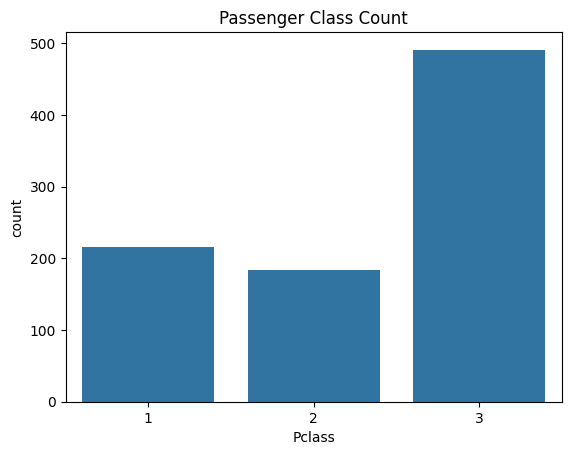

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

# Percentage of each class
pclass_distribution = df['Pclass'].value_counts(normalize=True) * 100
print(pclass_distribution)

**MULTIVARIATE ANALYSIS**

**Survival Analysis based on Sex**

<Axes: xlabel='Survived', ylabel='count'>

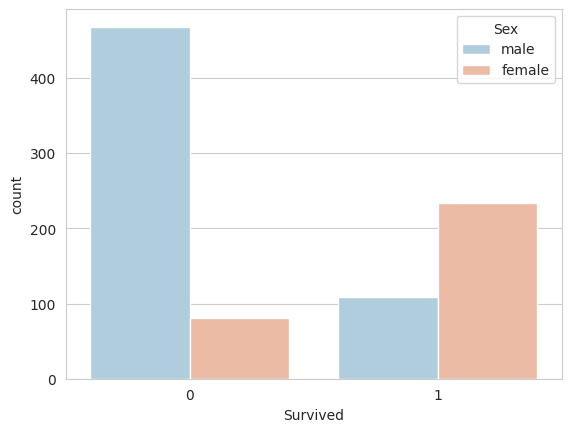

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette = 'RdBu_r')

INTERPRETATION - **More females have survived compared to males**

**Analysis of Survival based on passengers across the three classes**

<Axes: xlabel='Survived', ylabel='count'>

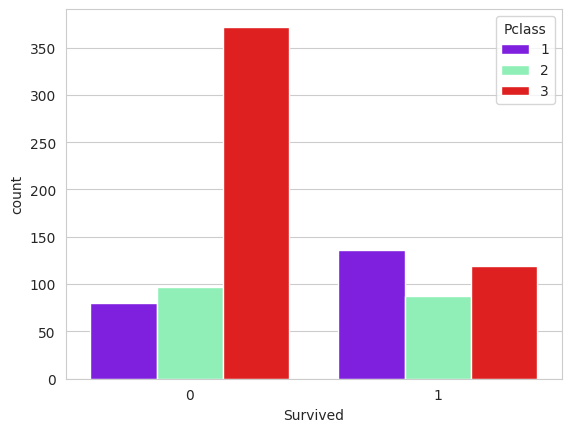

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette = 'rainbow')

**INTERPRETATION** - Passengers from class 1 has survived the most & Passengers from class 3 mostly not able to survive

**Distribution of Survival based on age**

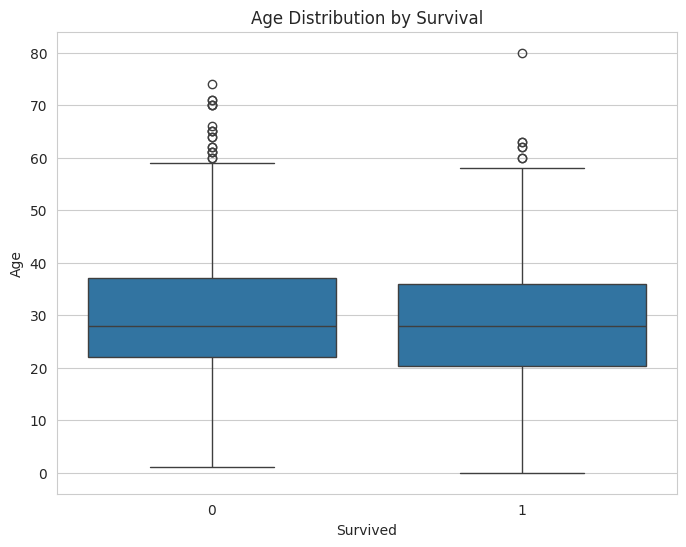

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

**CORRELATION BETWEEN NUMERICAL VARIABLES**

In [ ]:
corr_matrix = df.corr()

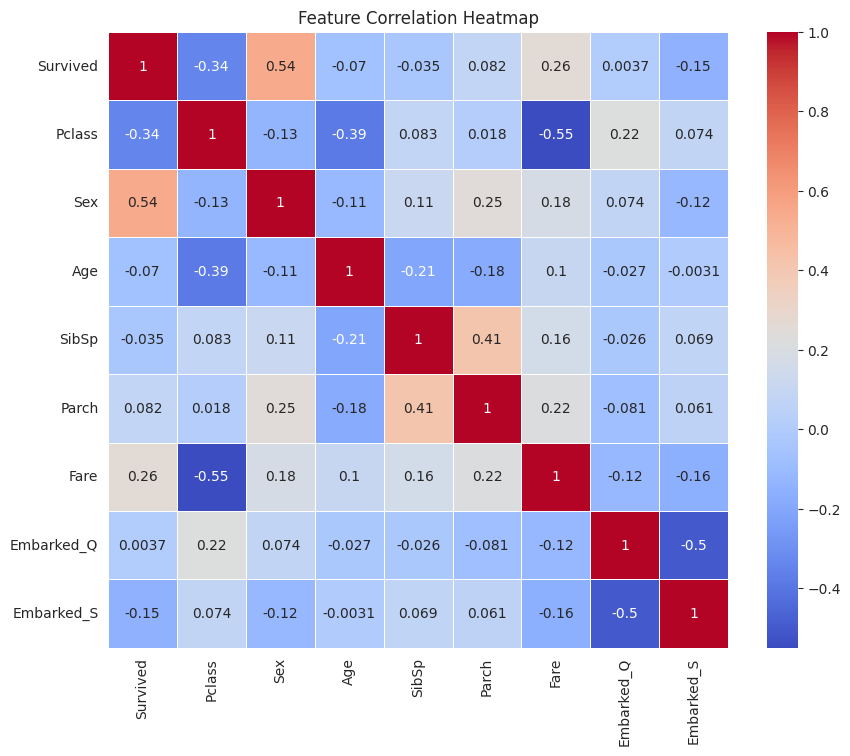

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

**INTERPRETATION** - A Strong correlation found between Fare and PClass

**DIVIDING TO FEATURES AND TARGET VARIABLES**

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.88, random_state=42)

# **TRAINING AND PREDICTION**

**LOGISTIC REGRESSION MODEL**




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lrm = LogisticRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8504672897196262
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        65
           1       0.81      0.81      0.81        42

    accuracy                           0.85       107
   macro avg       0.84      0.84      0.84       107
weighted avg       0.85      0.85      0.85       107



 **ACCURACY = 0.85**

**DECISION TREE CLASSIFICATION MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8037383177570093
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        65
           1       0.74      0.76      0.75        42

    accuracy                           0.80       107
   macro avg       0.79      0.80      0.80       107
weighted avg       0.80      0.80      0.80       107



**ACCURACY =  0.803**

**KNN CLASSIFICATION MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7383177570093458
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        65
           1       0.77      0.48      0.59        42

    accuracy                           0.74       107
   macro avg       0.75      0.69      0.70       107
weighted avg       0.74      0.74      0.72       107



**ACCURACY = 0.738**

**RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.822429906542056
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        65
           1       0.78      0.76      0.77        42

    accuracy                           0.82       107
   macro avg       0.81      0.81      0.81       107
weighted avg       0.82      0.82      0.82       107



**ACCURACY = 0.822**

**NAIVE BAYES CLASSIFIER MODEL**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8037383177570093
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        65
           1       0.74      0.76      0.75        42

    accuracy                           0.80       107
   macro avg       0.79      0.80      0.80       107
weighted avg       0.80      0.80      0.80       107



**ACCURACY = 0.803**

**SUPPORT VECTOR CLASSIFIER MODEL**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7009345794392523
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79        65
           1       0.81      0.31      0.45        42

    accuracy                           0.70       107
   macro avg       0.75      0.63      0.62       107
weighted avg       0.73      0.70      0.66       107



**ACCURACY = 0.70**

**XGB CLASSIFICATION MODEL**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8317757009345794
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        65
           1       0.76      0.83      0.80        42

    accuracy                           0.83       107
   macro avg       0.82      0.83      0.83       107
weighted avg       0.84      0.83      0.83       107



**ACCURACY = 0.83**

**FEATURE IMPORTANCE IN XGBOOST**

<Figure size 1000x800 with 0 Axes>

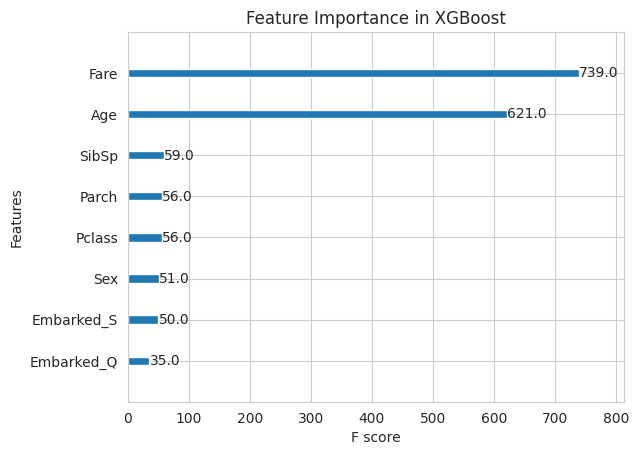

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb)
plt.title('Feature Importance in XGBoost')
plt.show()

**INTERPRETATION - LOGISTIC REGRESSION MODEL HAS THE HIGHEST ACCURACY VALUE OF 85.04% INDICATING THE MOST ACCURATE PREDICTION**